# TP2 - Spatial Filtering
ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

Participants: (FILL IN YOUR NAMES AND LASTNAMES)

# GOAL

In this lab we will practice the general principles of linear spatial filtering for 2D images:
- based on the convolution operation
- and applied with different filters to solve different tasks (denoising, highboost sharpening, border extraction)

Then, we will break some of the linear filtering assumptions:
- to find patterns in an image (Waldo/Charlie) with correlation,
- to filter preserving borders,
- to find corners in an image


# 0. Preparation

* Define the path to the images only once. Then, use the given path for the images

* Handling several large images can create large memory demands. In order to avoid large size files that slow processing, you can:
  - reuse the image variable names
  - clear large variables with the command
   ```reset_selective name_variable```
  - If required resize the images while debugging (e.g. to 100x100)
  - Before submiting your jupyter notebook empty the outputs first: go to the Kernel menu, restart and clear output.

  - If you get some warnings "IOPub data rate exceeded" launch your notebook with

  ```jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000```



### 0.1 Importing the required modules


In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from skimage.restoration import denoise_bilateral
from skimage.transform import resize, rescale
from scipy import ndimage
from scipy import signal


### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook and find all the images

In [7]:
IMDIR = r"C:\Users\maria\DataSim\ATRIM\TP2-ATRIM-Spatial Filtering\ATRIM-TP2\images"


In [8]:
#If using Colab
#from google.colab import drive
#drive.mount('/content/drive')
#IMDIR = "/content/drive/MyDrive/Colab Notebooks/2022-2023 Image Processing/02-spatial-filtering /images/"

### 0.3 Read and display the images
Check that you can read and display all the provided images. **Do not include this cell**, neither the code nor its ouput in the final report.

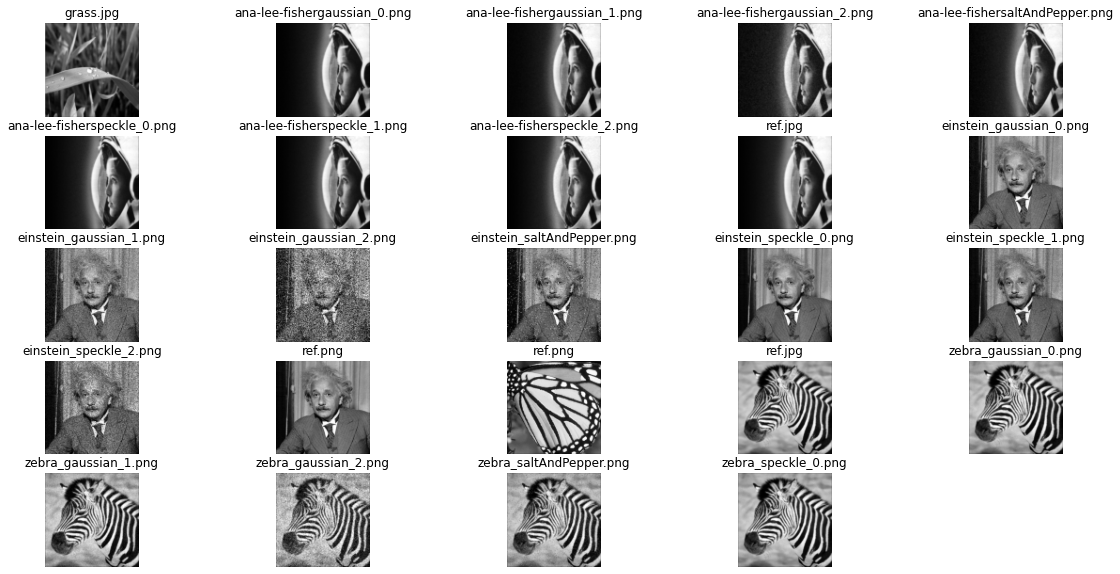

In [9]:
width=20
height=10
plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    #print(dirnames)
    for filename in filenames:
        f = os.path.join(root, filename)

        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):

            # print the paths to current filename if nothing is being found
            #print(filename)

            # read the image
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')

            # display it
            if im_counter >= 25:
                break;

            plt.subplot(5,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1



plt.show()




# 1 Linear spatial filtering with convolution




## 1.1. Mean Kernel Example
The following ``meanKernel'' function creates a smoothing kernel, which can be used with scipy's ``` ndimage.convolve(im,kernel) ```
convolution function to blur an image.

Run the following cells to display different versions of the kernel and the application of a mean_kernel on an image.


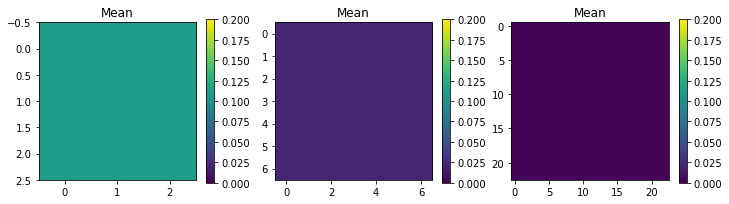

In [70]:
def meanKernel(hs):
    #hs defines the size of the kernel
    #hs is the integer half size of the kernel
    #creates an square filter with each side of length 2*hs+1
    kernel = np.zeros((hs*2+1,hs*2+1))
    kernel += 1/(hs*2+1)**2
    return kernel

#Display properties
width=12
height=3
plt.rcParams['figure.figsize'] = [width, height]

#creating and showing three mean kernels of different sizes
k = 1
for hs in [1,3,11]:
    plt.subplot(1,3,k)
    kernel = meanKernel(hs)
    plt.imshow(kernel, vmin=0, vmax=0.2)
    plt.title('Mean')
    plt.colorbar()
    k+=1
plt.show()


Text(0.5, 1.0, 'Mean scipy conv')

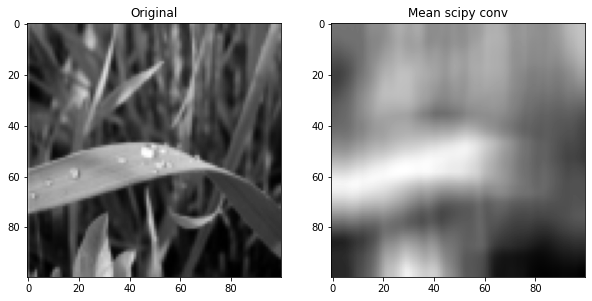

In [71]:
f = os.path.join(IMDIR, "grass.jpg")

#Display properties
width=10
height=5

#Filter parameters
hs = 11 #change le niveau de blur
sigma = 2

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))

# Define filter and convolve
kernel = meanKernel(hs)
im_filtered_scipy = ndimage.convolve(im,kernel)

# Display the original image
fig=plt.figure(figsize=(width, height))
plt.subplot(1,2,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# Display the filtered image
plt.subplot(1,2,2)
plt.imshow(im_filtered_scipy, cmap = 'gray')
plt.title('Mean scipy conv')


## 1.2. Gaussian Kernel
Following the above example, create, display and apply several (at least 3) Gaussian kernels with varying window size and standard deviation.

**Question: ** what is the sum of the kernel elements in each case?, why is this necessary?

```Hints```:
- use the 'None' or 'Nearest' interpolation options of imshow to display the kernel images

In [72]:
#both versions work, pick the one you are more confortable with

def gaussianKernel(hs,sigma, normalize=True): #half window size and Gaussian sigma
    # creating an empty kernel
    kernel = np.zeros((hs*2+1,hs*2+1))
    ax = np.arange(-hs, hs+1)

    # filling the kernel elements
    xx, yy = np.meshgrid(ax, ax)

    ### FILL BEGIN
    kernel = np.exp(-(xx**2+yy**2)/(2*sigma**2))/(2*np.pi*sigma**2) #FILL IN
    ### FILL END

    # normalize and return
    if normalize:
        kernel = kernel / np.sum(kernel)

    return kernel

#def gaussianLambdaKernel(size,sigma, normalize=True): #full window size and Gaussian sigma

    ### FILL BEGIN
    #kernel = np.fromfunction(lambda x, y: math.e ** ( FILL IN ), (size, size))
    ### FILL END

    #if normalize:
       # kernel = kernel / np.sum(kernel)

   # return kernel


In [ ]:
ax = np.arange(-3, 3+1)
xx, yy = np.meshgrid(ax, ax)
print(yy)

[[-3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3]]


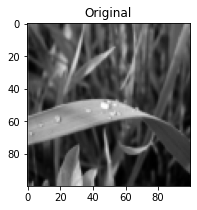

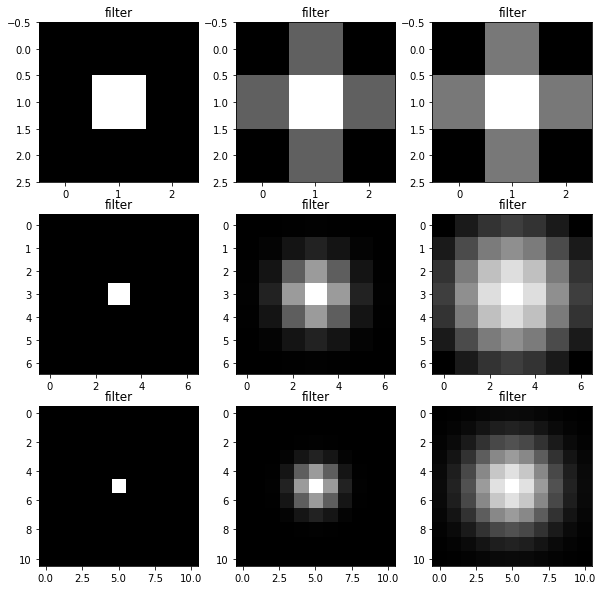

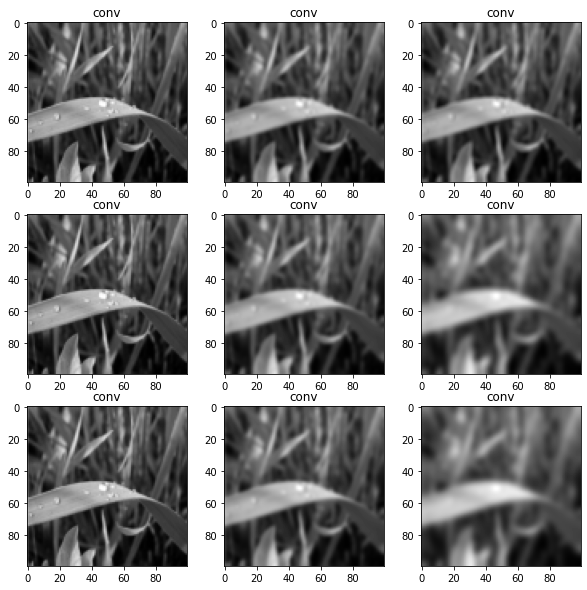

In [20]:
f = os.path.join(IMDIR, "grass.jpg")

#Display size
width=10
height=10
iter_filter = 1
iter_conv = 1
filters = []

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))

# Display the original image
fig=plt.figure(figsize=(3, 3))
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# Define filter parameters
filter_sizes=[1,3,5]
sigma_values=[0.1,1,2]

# Display filters as images
fig=plt.figure(figsize=(width, height))

#FILL IN
for hs in filter_sizes:
    for sigma in sigma_values:
        filter = gaussianKernel(hs,sigma, normalize=True)
        plt.subplot(3,3,iter_filter)
        plt.imshow(filter, cmap = 'gray')
        plt.title("filter")

        iter_filter += 1
        filters.append(filter)

plt.show()

# Convolve the image with the filter and display the filtered image
fig=plt.figure(figsize=(width, height))

for kernel in filters:
    #print(kernel)
    #print('prochaine')
    #print(np.sum(kernel[::2]))
    conv = ndimage.convolve(im,kernel)
    plt.subplot(3,3,iter_conv)
    plt.imshow(conv, cmap = 'gray')
    plt.title("conv")
    iter_conv += 1
plt.show()







## 1.3 Filtering with your own Convolution
**a)** Repeat the smoothing above with your own implementation of the ```convolution``` function. The function should receive as input an image and a filter kernel (matrix of weights) and return the filtered image. Compare your results with those from the scikit in-built function.

**b)** Apply a Gaussian filter of kernel size 7x7 (hs=3) and sigma 2 display side by side the results of your convolution vs. those of the in-built function to check your implementation is correct. Clearly state on the title of the image which version of the convolution function is being used.

**c)** **Write down your findings**, notably the reasons for any possible difference with the in-built implementation.

**d)** Why and how can the convolution can be written as a matrix multiplication? why is it interesting?
```Hint```:  see http://cs231n.github.io/convolutional-networks/

In [26]:
def myConvolution(imsource,kernel):

    # Find image and kernel sizes
    im_shape = imsource.shape
    imh,imw = im_shape[0], im_shape[1]
    kh,kw = kernel.shape
    print(kh)
    delta_h=int((kh-1)/2)
    delta_w=int((kw-1)/2)

    print(delta_h)
    # Image padding
    imPadded = np.zeros((imh+2*delta_h,imw+2*delta_w))
    imPadded[delta_h:imh+delta_h,delta_w:imw+delta_w] = imsource
    

    # Create an empty image to store the result
    imDest = np.zeros((imh,imw))

    ####################################################################################
    #BEGIN FILL IN
    for i in range(imh):
        for j in range(imw):
            #for u in range(kh):
             #   for v in range(kw):

                   # imDest[i,j] += kernel[u , v]*imPadded[i +2*delta_h- u, j +2*delta_h- v]

            imPatch = imPadded[i:i+kh, j:j+kw]
            imDest[i,j] = np.sum(imPatch*np.flip(kernel))


    #END FILL IN
    return imDest


23
11


Text(0.5, 1.0, 'Convole')

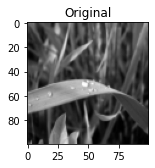

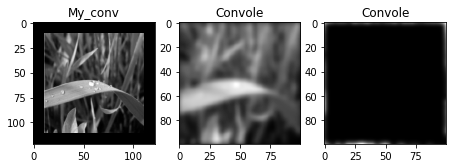

In [27]:
f = os.path.join(IMDIR, "grass.jpg")

#Display properties
width=10
height=10

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))

# Display the original image
fig=plt.figure(figsize=(width, height))
plt.subplot(1,4,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# Define filter parameters
hs = 11
sigma = 2
kernel = gaussianKernel(hs,sigma)


# Convolve and display the filtered image
conv = myConvolution(im,kernel)
fig=plt.figure(figsize=(width, height))
plt.subplot(1,4,2)
plt.imshow(conv, cmap = 'gray')
plt.title('My_conv')

conv_2 = ndimage.convolve(im,kernel)
plt.subplot(1,4,3)
plt.imshow(conv, cmap = 'gray')
plt.title('Convole')

dif = conv_2 - conv
plt.subplot(1,4,4)
plt.imshow(dif, cmap = 'gray')
plt.title('Convole')

## 1.4 Derivative filters

Define the required kernel function and convolve them with the *AscentB* or *Moon* images in the ``enhance`` folder to obtain
*  the gradient image in the horizontal direction
*  the gradient image in the vertical direction
*  the Laplacian of the image
*  the sharpened image after addition of the Laplacian "details" (and normalization)


In [12]:
def sobel_x():
    kernel = np.zeros((3,3))
    kernel = [[1, 0, -1],
             [2, 0, -2],
             [1 ,0, -1]]
    return kernel

def sobel_y():
    kernel = np.zeros((3,3))
    kernel = [[1, 2, 1],
             [0, 0, 0],
             [-1 ,-2, -1]]
    return kernel


def laplacian():

    kernel = [[0, 1, 0],
             [1, -4, 1],
             [0, 1, 0]]

    return kernel

def normalize(im):
    im = (im-im.min())/(im.max()-im.min())
    return im


Text(0.5, 1.0, 'laplace')

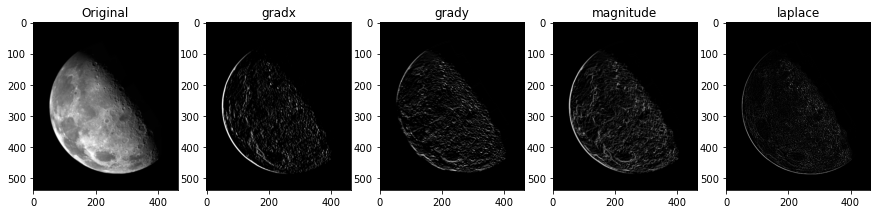

In [29]:
f = os.path.join(IMDIR, "enhance/moon-blurred.tif")
#f = os.path.join(IMDIR, "ascentB.png")

#Display properties
width=15
height=5

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = normalize(im)
#im = resize(im,(100,100))

# Display the original image
fig=plt.figure(figsize=(width, height))
plt.subplot(1,5,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# Convolve and display the filtered and the enhanced image

im_filtered_x =  ndimage.convolve(im,sobel_x())
im_filtered_x =  np.clip(im_filtered_x, 0, 1) #sature l'image entre 0 et 1
im_filtered_y =  ndimage.convolve(im,sobel_y())
im_filtered_y =  np.clip(im_filtered_y, 0, 1)
im_filtered_laplace =  ndimage.convolve(im, laplacian())
im_filtered_laplace  =  np.clip(im_filtered_laplace, 0, 1)

plt.subplot(1,5,2)
plt.imshow(im_filtered_x, cmap = 'gray')
plt.title('gradx')
plt.subplot(1,5,3)
plt.imshow(im_filtered_y, cmap = 'gray')
plt.title('grady')

norme = np.sqrt(im_filtered_x**2+im_filtered_y**2)
plt.subplot(1,5,4)
plt.imshow(norme, cmap = 'gray')
plt.title('magnitude')

plt.subplot(1,5,5)
plt.imshow(im_filtered_laplace, cmap = 'gray')
plt.title('laplace')




# 2 Non linear filtering

Choose one among the two following tasks: either finding Charlie or bilateral filter.

Hint: USE A DIFFERENT NOTEBOOK FOR WALDO

## 2.1 Correlation: Finding Charlie

Use patch-wise Normalized Cross Correlation (NCC) to automatically find Waldo (Charlie) in an image. To this end, look for the template image (``charlie-template``) inside ``marche-crop`` or the ``marche`` images. As the process can be long start with the cropped version, you might also find it useful to **create a separate notebook for this task only** as it is memory consuming. Evaluate the NCC expression from the slides (described in the non-local means advance filtering) to compare the template with every location in the target image, store the results and retrieve the location with the highest NCC score. Draw this location on the target image.

**Describe the process assumptions and limitations**

Hint: Start from your convolution operation but apply locally normalized correlation at each pixel



NameError: name 'imPadded' is not defined

## 2.2 Bilateral Filter  

**a)** Implement your own version of the ``bilateral`` filter and compare its results vs. scikit ``denoise_bilateral`` function.

**b)** Compare and comment the bilateral results versus the mean and gaussian filter for the ``zebra`` group of images of the ``bilateral`` folder


In [65]:
#poprieté pour comparation
def MSE(noisy_image, ref_image):
    return np.mean((ref_image - noisy_image)**2)

def PSNR(noisy_image, ref_image):
    max = np.max(noisy_image)
    MSE_ = MSE(noisy_image, ref_image)
    PSNR = 20*np.log(max/np.sqrt(MSE_))
    return PSNR

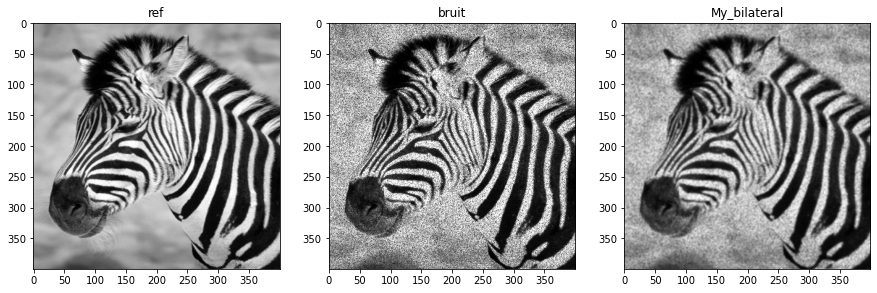

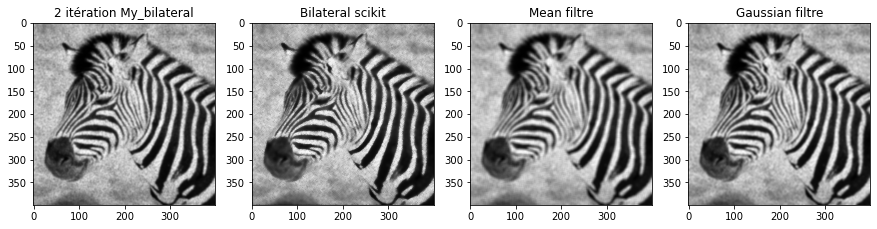

PSNR My_bilateral:52.83572485120297
PSNR Scipy: 47.530293012143645 


In [81]:
from skimage.restoration import denoise_bilateral

#ouvrir les archives de zebra
f_bruit = os.path.join(IMDIR, "bilateral\zebra\zebra_speckle_2.png") #changer le bruit voulu
f_ref = os.path.join(IMDIR, "bilateral\zebra/ref.jpg")

width=15
height=5

#lire l'image, convertir et normaliser
im = io.imread(f_bruit, as_gray=True)
im = im.astype(float)
im = normalize(im)

im_ref = io.imread(f_ref, as_gray=True) 
im_ref = im_ref.astype(float)
im_ref = normalize(im_ref)

#parametres du filtre
hs = 3
sigma1 = 1
sigma2 = 2

#notre version du filtre bilateral
def bilateral(im, hs, sigma1, sigma2):
    bilateral_filter = np.zeros((2*hs+1, 2*hs+1))
    grid = np.arange(-hs, hs+1)
    u, v = np.meshgrid(grid, grid)
    bilateral_filter = np.exp(-(u**2+v**2)/(2*sigma1**2))*np.exp(-(im[u,v]-im[0,0])**2/(2*sigma2**2))
    
    #normalizer
    bilateral_filter = bilateral_filter/np.sum(bilateral_filter)
    
    return bilateral_filter

#création du filtre
bilateral_myversion = bilateral(im, hs, sigma1, sigma2) 

#application du filtre
im_filtered_myversion = ndimage.convolve(im, bilateral_myversion)
#test pour la deuxiéme itération
im_filtered_myversion_2 = ndimage.convolve(im_filtered_myversion, bilateral_myversion)

#comparation avec filtre scikit-------------------------------------------------------------------------------
#application du filtre scikit
im_filtered_scipy = denoise_bilateral(im, win_size=hs*2+1, sigma_color=0.3, sigma_spatial=20)
#test pour la deuxiéme itération
im_filterd_scipy_2 = denoise_bilateral(im_filtered_scipy, win_size=hs*2+1, sigma_color=0.05, sigma_spatial=15)

#comparation avec mean et gaussian filtre-------------------------------------------------------------------------
#mean filter
kernel = meanKernel(hs)
im_filtered_mean = ndimage.convolve(im,kernel)

#gaussian filter
gaussian = gaussianKernel(hs,sigma, normalize=True)
im_filtered_gaussian = ndimage.convolve(im,gaussian)


fig = plt.figure(figsize = (width, height))
plt.subplot(1,3,1)
plt.imshow(im_ref, cmap = 'gray')
plt.title('ref')

plt.subplot(1,3,2)
plt.imshow(im, cmap = 'gray')
plt.title('bruit')

plt.subplot(1,3,3)
plt.imshow(im_filtered_myversion, cmap = 'gray')
plt.title('My_bilateral')
plt.show()

#test 2 itérations de filtrage -------------------------------------------------------
fig = plt.figure(figsize = (width, height))
plt.subplot(1,4,1)
plt.imshow(im_filtered_myversion_2, cmap = 'gray')
plt.title('2 itération My_bilateral')


#comparation scikit ----------------------------------------------------------------
plt.subplot(1,4,2)
plt.imshow(im_filtered_scipy, cmap = 'gray')
plt.title('Bilateral scikit')

#comparation mean ----------------------------------------------------------------
plt.subplot(1,4,3)
plt.imshow(im_filtered_mean, cmap = 'gray')
plt.title('Mean filtre')


#comparation gaussian ----------------------------------------------------------------
plt.subplot(1,4,4)
plt.imshow(im_filtered_gaussian, cmap = 'gray')
plt.title('Gaussian filtre')

plt.show()

#comparation des filtrages pour le valeur de PSNR 
print(f'PSNR My_bilateral:{PSNR(im_filtered_myversion, im_ref)}\nPSNR Scipy: {PSNR(im_filtered_scipy, im_ref)} ')

# 3. Harris corners

3.1 Implement the Harris corner detector.

**a)** Compute and show the gradient images ($Ix$ and $Iy$)  as well as their outer products ($IxIx$, $IxIy$, $I_yI_y$) for the *pixel-pancho* images in the ``corners`` folder

**b)** From the previous result, compute the **weighted** and **aggregated** gradient products. *Hints:*
- To weigh, convolve the gradient products ($IxIx$, $IxIy$, and $I_yI_y$) each with a Gaussian filter.
- To aggregate, sum up at each pixel location the values of the weighed gradient products over a window ($(x,y)\in\mathcal{N}_{x_0,y_0}$).

**c)** From the previous result,
- build the structure tensor or Harris matrix $M$ for each pixel $(x_0,y_0)$ in the image.
- and compute the cornerness criteria based on its eigenvalues. Display the result as a *score map* image.
Hint: Compute the cornerness implicitly (using the fact that determinant of a 2x2 matrix is the product of the matrix eigenvalues and the trace its sum)

**d)** Define a threshold on the score map, and display the detected corners on top of the original images




3.2 **Questions**
**a)** Why is the Gaussian filtering important?

**b)** Explain how steps 3.1 b) and 3.2 c) are related to the autocorrelation

**c)** What do the eigenvalues of the structure tensor matrix represent?

**d)** What is the influence of the k parameter?

**e)** What other parameters determine the result?

**f)** Observing the results for the two images, why is it interesting to extract the corners?